## Model For SI Task BASELINE

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from keras.preprocessing.text import Tokenizer
import pandas as pd
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from matplotlib import pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, Bidirectional
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as plt

In [3]:
df_total = pd.read_csv("/content/gdrive/MyDrive/titans_milestone3/codebase/Task-SI/processed_data/train_SI_labels_bioe_PNP.csv") # provide the path for train_SI_labels_bioe_PNP.csv file
df_dev = pd.read_csv("/content/gdrive/MyDrive/titans_milestone3/codebase/Task-SI/processed_data/dev_SI_labels_bioe_PNP.csv") # provide the complete path for dev_SI_labels_bioe_PNP file

In [4]:
df_total.head()

,Id,Text,Labels,tok_idx,lentext,lenLabels,BIOE_LABELS,BIOE_LABELS_LEN
0,111111111,Next plague outbreak Madagascar could stronger,NP NP NP NP NP NP,0 5 12 24 35 45,6,6,O O O O O O,6
1,111111111,Geneva World Health Organisation chief Wednesd...,NP NP NP NP NP NP NP NP NP NP P NP NP NP NP NP...,61 74 80 87 100 109 119 126 133 140 149 171 18...,20,20,O O O O O O O O O O B O O O O O O O O O,20
2,111111111,next transmission could pronounced stronger Di...,P P P P P NP NP NP NP NP NP NP NP NP NP NP,269 274 287 301 315 330 339 347 354 362 374 37...,16,16,B I I I E O O O O O O O O O O O,16
3,111111111,outbreak bubonic plague spread infected rats v...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,443 460 468 485 495 504 509 513 518 529 539 54...,22,22,O O O O O O O O O O O O O O O O O O O O O O,22
4,111111111,Madagascar suffered bubonic plague outbreaks a...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP,653 668 677 685 692 702 709 715 720 732 738 74...,15,15,O O O O O O O O O O O O O O O,15


In [5]:
#split training data

df_train, df_val = train_test_split(df_total, test_size=0.2, random_state=42)

In [6]:
df_train.head()

,Id,Text,Labels,tok_idx,lentext,lenLabels,BIOE_LABELS,BIOE_LABELS_LEN
13780,779394730,church lawyers advocates institution say repor...,NP NP NP NP NP NP NP NP NP NP P P NP NP NP,1117 1124 1142 1160 1172 1180 1187 1198 1205 1...,15,15,O O O O O O O O O O B E O O O,15
8020,754402671,World Health Organization said Tuesday taking ...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,62 68 75 94 102 122 129 138 143 155 159 171 18...,25,25,O O O O O O O O O O O O O O O O O O O O O O O O O,25
16664,790777028,Throughout process interviewed FBI,NP NP NP NP,2658 2674 2693 2712,4,4,O O O O,4
12661,773748383,click mouse summon almost information could po...,NP NP NP NP NP NP NP NP NP NP NP NP,4483 4494 4508 4515 4526 4541 4547 4556 4561 4...,12,12,O O O O O O O O O O O O,12
3886,721710340,recipient two extensions,NP NP NP,2553 2568 2572,3,3,O O O,3


In [7]:
df_val.head()

,Id,Text,Labels,tok_idx,lentext,lenLabels,BIOE_LABELS,BIOE_LABELS_LEN
14264,782017101,St Pope John XXIII explained principal task co...,NP NP NP NP NP NP NP NP NP NP NP NP NP,2601 2604 2609 2614 2620 2636 2646 2659 2678 2...,13,13,O O O O O O O O O O O O O,13
10369,762206044,Awan obtained legal representation two lawyers...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,9448 9453 9462 9468 9488 9492 9504 9516 9527 9...,17,17,O O O O O O O O O O O O O O O O O,17
2026,701837665,Ostensibly next six months needed carefully re...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP,4783 4799 4804 4808 4819 4829 4839 4850 4861 4...,15,15,O O O O O O O O O O O O O O O,15
14401,782086447,said Cardinal William Levada former Prefect Co...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,16720 16729 16738 16746 16754 16761 16776 1679...,29,29,O O O O O O O O O O O O O O O O O O O O O O O ...,29
11967,770221823,updates free charge,NP NP NP,938 946 954,3,3,O O O,3


In [8]:
df_dev.head()

,Id,Text,Labels,tok_idx,lentext,lenLabels,BIOE_LABELS,BIOE_LABELS_LEN
0,730081389,Police previously gone home Ohio patrol office...,NP NP NP NP NP NP NP NP,0 11 22 30 41 46 53 67,8,8,O O O O O O O O,8
1,730081389,CLEVELAND,NP,75,1,1,O,1
2,730081389,Police invstigating domestic disputes previous...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,87 94 107 116 129 140 152 165 169 177 182 186 ...,23,23,O O O O O O O O O O O O O O O O O O O O O O O,23
3,730081389,Westerville Officers Eric Joering Anthony More...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP,312 324 333 338 355 363 381 388 402 407 424 43...,16,16,O O O O O O O O O O O O O O O O,16
4,730081389,suspect old Quentin Smith shot wounded officer...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,490 507 511 519 530 539 554 567 576 581 587 59...,17,17,O O O O O O O O O O O O O O O O O,17


In [9]:

oov_token = "<OOV>"
word_tokenizer = Tokenizer(oov_token=oov_token)
word_tokenizer.fit_on_texts(df_train['Text'].values)

In [10]:
word_tokenizer.word_index.items()

dict_items([('<OOV>', 1), ('said', 2), ('trump', 3), ('one', 4), ('would', 5), ('also', 6), ('church', 7), ('people', 8), ('us', 9), ('pope', 10), ('president', 11), ('new', 12), ('even', 13), ('time', 14), ('could', 15), ('may', 16), ('years', 17), ('like', 18), ('state', 19), ('iran', 20), ('kavanaugh', 21), ('francis', 22), ('two', 23), ('many', 24), ('told', 25), ('know', 26), ('first', 27), ('obama', 28), ('cardinal', 29), ('made', 30), ('fbi', 31), ('american', 32), ('report', 33), ('government', 34), ('well', 35), ('man', 36), ('world', 37), ('clinton', 38), ('god', 39), ('catholic', 40), ('say', 41), ('case', 42), ('states', 43), ('last', 44), ('public', 45), ('house', 46), ('see', 47), ('right', 48), ('according', 49), ('law', 50), ('left', 51), ('back', 52), ('investigation', 53), ('united', 54), ('court', 55), ('news', 56), ('take', 57), ('must', 58), ('former', 59), ('story', 60), ('way', 61), ('still', 62), ('evidence', 63), ('never', 64), ('bishops', 65), ('police', 66), 

In [11]:
train_text_encoded = word_tokenizer.texts_to_sequences(df_train['Text'].values)
val_text_encoded = word_tokenizer.texts_to_sequences(df_val['Text'].values)
dev_text_encoded=word_tokenizer.texts_to_sequences(df_dev['Text'].values)

In [12]:
# encode Y
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(df_train['Labels'].values)

In [13]:
train_label_encoded = tag_tokenizer.texts_to_sequences(df_train['Labels'].values)
val_label_encoded = tag_tokenizer.texts_to_sequences(df_val['Labels'].values)
dev_label_encoded=tag_tokenizer.texts_to_sequences(df_dev['Labels'].values)

In [14]:
tag_tokenizer.word_index

{'np': 1, 'p': 2}

In [15]:
print("** Raw data point **", "\n", "-"*100, "\n")
print('X: ', df_train['Text'].values[90], '\n')
print('Y: ', df_train['Labels'].values[90], '\n')
print()
print("** Encoded data point **", "\n", "-"*100, "\n")
print('X: ', train_text_encoded[90], '\n')
print('Y: ', train_label_encoded[90], '\n')

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  Church address massive infestation homosexual priests prelates without removing authority ensuring promote homosexual successors generation generation 

Y:  P P P P P P P P P P P P P P P P 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [7, 924, 1704, 10200, 223, 236, 1371, 96, 2172, 412, 7617, 2038, 223, 6202, 2839, 2839] 

Y:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 



In [16]:
print("** Raw data point **", "\n", "-"*100, "\n")
print('X: ', df_val['Text'].values[53], '\n')
print('Y: ', df_val['Labels'].values[53], '\n')
print()
print("** Encoded data point **", "\n", "-"*100, "\n")
print('X: ', val_text_encoded[53], '\n')
print('Y: ', val_label_encoded[53], '\n')

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  words loaded meanings conservative political base 

Y:  NP NP NP NP NP NP 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [401, 10093, 1, 599, 230, 1219] 

Y:  [1, 1, 1, 1, 1, 1] 



In [17]:
print("** Raw data point **", "\n", "-"*100, "\n")
print('X: ', df_dev['Text'].values[0], '\n')
print('Y: ', df_dev['Labels'].values[0], '\n')
print()
print("** Encoded data point **", "\n", "-"*100, "\n")
print('X: ', dev_text_encoded[0], '\n')
print('Y: ', dev_label_encoded[0], '\n')

** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  Police previously gone home Ohio patrol officers killed 

Y:  NP NP NP NP NP NP NP NP 


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [66, 562, 912, 192, 2264, 1986, 367, 438] 

Y:  [1, 1, 1, 1, 1, 1, 1, 1] 



In [18]:
different_length = [1 if len(input) != len(output) else 0 for input, output in zip(train_text_encoded, train_label_encoded)]
print("{} sentences have disparate input-output lengths.".format(sum(different_length)))

0 sentences have disparate input-output lengths.


In [19]:
different_length_val = [1 if len(input) != len(output) else 0 for input, output in zip(val_text_encoded, val_label_encoded)]
print("{} sentences have disparate input-output lengths.".format(sum(different_length_val)))

0 sentences have disparate input-output lengths.


In [20]:
different_length_dev = [1 if len(input) != len(output) else 0 for input, output in zip(dev_text_encoded, dev_label_encoded)]
print("{} sentences have disparate input-output lengths.".format(sum(different_length_dev)))

0 sentences have disparate input-output lengths.


In [21]:
lengths1 = [len(seq) for seq in train_text_encoded]
print("Length of longest sentence: {}".format(max(lengths1)))

Length of longest sentence: 68


In [22]:
lengths2 = [len(seq) for seq in val_text_encoded]
print("Length of longest sentence: {}".format(max(lengths2)))

Length of longest sentence: 53


In [23]:
lengths3 = [len(seq) for seq in dev_text_encoded]
print("Length of longest sentence: {}".format(max(lengths3)))

Length of longest sentence: 49


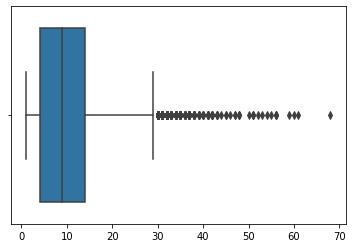

In [24]:
sns.boxplot(lengths1)

## Padding Sentences

In [62]:
from keras.preprocessing.sequence import pad_sequences
MAX_SEQ_LENGTH = 86 #lengths1
X_padded_train = pad_sequences(train_text_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
Y_padded_train = pad_sequences(train_label_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")

In [63]:
X_padded_val = pad_sequences(val_text_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
Y_padded_val = pad_sequences(val_label_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")

In [64]:
X_padded_dev = pad_sequences(dev_text_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")
Y_padded_dev = pad_sequences(dev_label_encoded, maxlen=MAX_SEQ_LENGTH, padding="post")

In [65]:
X_train, Y_train = X_padded_train, Y_padded_train
X_val,Y_val = X_padded_val,Y_padded_val
X_dev,Y_dev = X_padded_dev,Y_padded_dev

In [66]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_dev.shape)
print(Y_dev.shape)

(14853, 86)
(14853, 86)
(3714, 86)
(3714, 86)
(3589, 86)
(3589, 86)


#### Created Embedding Matrix using the below code and stored it for further use to avoid downloading and running huge google vector for every execution

In [45]:
# word2vec
from gensim.models import KeyedVectors
path =  r'/content/gdrive/MyDrive/titans_milestone3/codebase/googlew2v/GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(path, binary=True)

In [46]:
# assign word vectors from word2vec model
import numpy as np
from tqdm import tqdm
EMBEDDING_SIZE  = 300  # each word in word2vec model is represented using a 300 dimensional vector
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1 # +1 for padding 

# create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))

# create a word to index dictionary mapping
word2id = word_tokenizer.word_index

# copy vectors from word2vec model to the words present in corpus
for word, index in tqdm(word2id.items()):
    try:
        embedding_weights[index, :] = word2vec[word]
    except KeyError:
        pass

100%|██████████| 16595/16595 [00:00<00:00, 258977.98it/s]


In [30]:
# # np.save('data.npy', embedding_weights) # save
# import numpy as np
# embedding_weights = np.load('/content/gdrive/MyDrive/titans_milestone3/codebase/Task-SI/data.npy') # load # Provide the path of data.npy file inside the data folder

In [47]:
embedding_weights[10] 

array([ 0.58984375,  0.12792969,  0.19238281,  0.46289062, -0.30664062,
       -0.328125  ,  0.00077438,  0.05517578,  0.59375   ,  0.18164062,
       -0.05981445, -0.328125  , -0.0703125 ,  0.01660156,  0.265625  ,
       -0.20605469, -0.06298828,  0.140625  ,  0.34765625, -0.11572266,
        0.28710938,  0.22070312,  0.32617188,  0.01074219,  0.04833984,
       -0.15625   , -0.14648438,  0.05615234,  0.21972656, -0.20996094,
       -0.08105469, -0.05957031, -0.08740234,  0.07568359,  0.12255859,
       -0.22070312,  0.3359375 ,  0.36523438, -0.05908203,  0.453125  ,
        0.16601562,  0.12451172,  0.24414062,  0.24121094,  0.07617188,
       -0.03063965,  0.01672363,  0.11914062, -0.34765625,  0.09472656,
        0.23632812,  0.15625   , -0.34375   ,  0.14941406, -0.06103516,
        0.09667969, -0.33203125, -0.13476562,  0.22265625, -0.08984375,
        0.28515625,  0.12207031,  0.23046875,  0.01794434,  0.34960938,
        0.00680542, -0.19140625, -0.09716797,  0.1484375 ,  0.03

In [48]:
embedding_weights[0] # for padding

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [67]:
EMBEDDING_SIZE  = 300  # each word in word2vec model is represented using a 300 dimensional vector
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1 # +1 for padding 
print(VOCABULARY_SIZE)

16596


In [50]:
print("Embeddings shape: {}".format(embedding_weights.shape))

Embeddings shape: (16596, 300)


In [68]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from matplotlib import pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, Bidirectional
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [69]:
Y_train = to_categorical(Y_train)
print(Y_train.shape)

(14853, 86, 3)


In [70]:
Y_val=to_categorical(Y_val)
print(Y_val.shape)

(3714, 86, 3)


In [71]:
Y_dev=to_categorical(Y_dev)
print(Y_dev.shape)

(3589, 86, 3)


In [72]:
# print number of samples in each set
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_val.shape))
print('Shape of output sequences: {}'.format(Y_val.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_dev.shape))
print('Shape of output sequences: {}'.format(Y_dev.shape))

TRAINING DATA
Shape of input sequences: (14853, 86)
Shape of output sequences: (14853, 86, 3)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (3714, 86)
Shape of output sequences: (3714, 86, 3)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (3589, 86)
Shape of output sequences: (3589, 86, 3)


In [73]:
# Classes are 3 P, NP and padding
NUM_CLASSES = Y_train.shape[2]
NUM_CLASSES


3

### Bidirectional LSTM

In [74]:
from tensorflow import keras
from tensorflow.keras import backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [75]:
bidirect_model = Sequential()
bidirect_model.add(Embedding(input_dim     = VOCABULARY_SIZE,
                             output_dim    = EMBEDDING_SIZE,
                             input_length  = MAX_SEQ_LENGTH,
                             weights       = [embedding_weights],
                             trainable     = False
                            #  mask_zero=True 
))
bidirect_model.add(Bidirectional(LSTM(264, return_sequences=True)))
bidirect_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

In [76]:
bidirect_model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=[get_f1])

In [77]:
bidirect_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 86, 300)           4978800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 86, 528)          1193280   
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 86, 3)            1587      
 tributed)                                                       
                                                                 
Total params: 6,173,667
Trainable params: 1,194,867
Non-trainable params: 4,978,800
_________________________________________________________________


In [78]:
bidirect_training = bidirect_model.fit(X_train, Y_train, batch_size=200, epochs=20, validation_data=(X_val, Y_val))

Epoch 1/20
75/75 [==============================] - 13s 65ms/step - loss: 0.1433 - get_f1: 0.9178 - val_loss: 0.0539 - val_get_f1: 0.9818
Epoch 2/20
75/75 [==============================] - 4s 55ms/step - loss: 0.0503 - get_f1: 0.9825 - val_loss: 0.0490 - val_get_f1: 0.9829
Epoch 3/20
75/75 [==============================] - 4s 55ms/step - loss: 0.0457 - get_f1: 0.9832 - val_loss: 0.0456 - val_get_f1: 0.9833
Epoch 4/20
75/75 [==============================] - 4s 55ms/step - loss: 0.0441 - get_f1: 0.9834 - val_loss: 0.0455 - val_get_f1: 0.9829
Epoch 5/20
75/75 [==============================] - 4s 55ms/step - loss: 0.0426 - get_f1: 0.9834 - val_loss: 0.0445 - val_get_f1: 0.9835
Epoch 6/20
75/75 [==============================] - 4s 55ms/step - loss: 0.0421 - get_f1: 0.9836 - val_loss: 0.0466 - val_get_f1: 0.9836
Epoch 7/20
75/75 [==============================] - 4s 56ms/step - loss: 0.0413 - get_f1: 0.9839 - val_loss: 0.0446 - val_get_f1: 0.9836
Epoch 8/20
75/75 [======================

In [79]:
bidirect_model.evaluate(X_val,Y_val)

117/117 [==============================] - 1s 8ms/step - loss: 0.0475 - get_f1: 0.9831


[0.047473322600126266, 0.9830546975135803]

In [80]:
bidirect_model.evaluate(X_dev,Y_dev)

113/113 [==============================] - 1s 7ms/step - loss: 0.0402 - get_f1: 0.9863


[0.040176451206207275, 0.9862608313560486]

In [81]:
result = bidirect_model.predict(X_val)

In [82]:
result_dev = bidirect_model.predict(X_dev)

In [83]:
result_dev.shape

(3589, 86, 3)

In [ ]:
## Save result_test as numpy
# this will be used to build dataframe with predicted labels which is then used to find the span

In [84]:
import numpy as np
np.save('result_dev.npy', result_dev) 

In [85]:
# load
import numpy as np
result_dev_saved = np.load('result_dev.npy')

In [ ]:
##Test

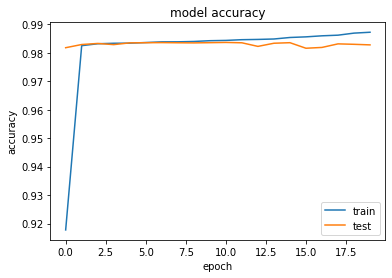

In [86]:
# visualise training history
plt.plot(bidirect_training.history['get_f1'])
plt.plot(bidirect_training.history['val_get_f1'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [ ]:
# import tensorflow as tf
# tf.keras.models.save_model(bidirect_model,'/content/gdrive/MyDrive/NLP/model_bilstm_f1_2new.h5',save_format='h5')

## Post Processing

In [ ]:
## result_test.npy is used to add column Pred_label in test data set 
## Find span --> create tsv --> run scorer

In [87]:
df_dev = pd.read_csv("/content/gdrive/MyDrive/titans_milestone3/codebase/Task-SI/processed_data/dev_SI_labels_bioe_PNP.csv")

In [88]:
df_dev.head()

,Id,Text,Labels,tok_idx,lentext,lenLabels,BIOE_LABELS,BIOE_LABELS_LEN
0,730081389,Police previously gone home Ohio patrol office...,NP NP NP NP NP NP NP NP,0 11 22 30 41 46 53 67,8,8,O O O O O O O O,8
1,730081389,CLEVELAND,NP,75,1,1,O,1
2,730081389,Police invstigating domestic disputes previous...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,87 94 107 116 129 140 152 165 169 177 182 186 ...,23,23,O O O O O O O O O O O O O O O O O O O O O O O,23
3,730081389,Westerville Officers Eric Joering Anthony More...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP,312 324 333 338 355 363 381 388 402 407 424 43...,16,16,O O O O O O O O O O O O O O O O,16
4,730081389,suspect old Quentin Smith shot wounded officer...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,490 507 511 519 530 539 554 567 576 581 587 59...,17,17,O O O O O O O O O O O O O O O O O,17


In [89]:
import numpy as np
result_dev = np.load('result_dev.npy')
result_dev.shape

(3589, 86, 3)

In [90]:
from tqdm import tqdm
res_label=[]
res_len=[]
for x in tqdm(result_dev):
    count=0
    res=[]
    for val in x:
        if np.argmax(val)!=0:
            count+=1
            threshold = float(val[1])/float(val[2])
            if threshold<=10.0:
                res.append('P')
            else:
                res.append('NP')
    res_label.append(' '.join(r for r in res))
    res_len.append(count)

100%|██████████| 3589/3589 [00:00<00:00, 5668.54it/s]


In [91]:
df_dev['Pred_label'] = res_label
df_dev['Pred_label_len']=res_len

In [92]:
df_dev.head()

,Id,Text,Labels,tok_idx,lentext,lenLabels,BIOE_LABELS,BIOE_LABELS_LEN,Pred_label,Pred_label_len
0,730081389,Police previously gone home Ohio patrol office...,NP NP NP NP NP NP NP NP,0 11 22 30 41 46 53 67,8,8,O O O O O O O O,8,NP NP NP NP NP NP NP NP,8
1,730081389,CLEVELAND,NP,75,1,1,O,1,NP,1
2,730081389,Police invstigating domestic disputes previous...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,87 94 107 116 129 140 152 165 169 177 182 186 ...,23,23,O O O O O O O O O O O O O O O O O O O O O O O,23,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,23
3,730081389,Westerville Officers Eric Joering Anthony More...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP,312 324 333 338 355 363 381 388 402 407 424 43...,16,16,O O O O O O O O O O O O O O O O,16,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP,16
4,730081389,suspect old Quentin Smith shot wounded officer...,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,490 507 511 519 530 539 554 567 576 581 587 59...,17,17,O O O O O O O O O O O O O O O O O,17,NP NP NP NP NP NP NP NP NP NP NP NP NP NP NP N...,17


In [93]:
df_dev.to_csv('Test_result_new_sent.csv',index=False)

### Generating span for dev articles

In [94]:
arr_id = list(df_dev['Id'].unique())
len(arr_id)

75

In [95]:
from collections import defaultdict
import os
span_dict_val=defaultdict(list)
val_text=defaultdict(str)

path2=r"/content/gdrive/MyDrive/titans_milestone3/codebase/datasets/dev-labels-task-si"
path = r"/content/gdrive/MyDrive/titans_milestone3/codebase/datasets/dev-articles"
fileList = os.listdir(path)
for filename in tqdm(sorted(fileList)):
    article_id = os.path.basename(filename).split(".")[0][7:]
    with open(path+"//"+filename, "r", encoding="utf-8") as file:
        file_text = file.read()
    val_text[article_id]=file_text
    span_article="article"+article_id+".task-si.labels"
    with open(path2+"//"+span_article, "r", encoding="utf-8") as f:
        for row in f.readlines():
            s=row.rstrip().split("\t")[1:]
            l=int(s[0])
            r=int(s[1])
            span_dict_val[article_id].append((l,r))

100%|██████████| 75/75 [00:37<00:00,  2.01it/s]


In [96]:
import spacy
nlp = spacy.load('en_core_web_sm')
ids_arr=[]
start_arr=[]
end_arr=[]
for ids in tqdm(arr_id):
    text = df_dev[df_dev['Id']==ids]['Text'].values
    doc = nlp(val_text[str(ids)])
    pred_label = df_dev[df_dev['Id']==ids]['Pred_label'].values
    i=0
    ans=[]
    for sent1 in doc.sents:
        if i<len(text):
            s=text[i].split(" ")
            l=pred_label[i].split(" ")
            d={}
            for j in range(len(s)):
                if j<=(len(l)-1):
                    d[s[j]]=l[j]
            start=-1
            last =-1
            for token in sent1:
                if token.text in d:
                    if d[token.text]=='P':
                        if start==-1:
                            start=token.idx
                        last=token.idx+len(token.text)
            if start!=-1:
                ids_arr.append(ids)
                start_arr.append(start)
                end_arr.append(last)
            i+=1

100%|██████████| 75/75 [00:09<00:00,  7.83it/s]


In [97]:
import pandas as pd
dict1 = {'Id': ids_arr, 'Start': start_arr, 'End':end_arr}     
df = pd.DataFrame(dict1)
df.to_csv('/content/gdrive/MyDrive/titans_milestone3/codebase/Result-SI/Result_SI_baseline_DEV.tsv',index=False, header=False,sep="\t") # tsv to be used for scorer